In [59]:
# importing basic ibraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset and basic Exploration

In [60]:
# load the dataset
df = pd.read_csv("/content/Copy of PHISHING_DATASET.csv")
df.head()

,URL_IDENTIFICATION,URL_LENGTH,CHARACTER_SET,SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,COUNTRY,STATE,REGISTRATION_DATE,UPDATED_DATE,...,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
0,A0_71,21,ISO-8859-1,7,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,United Kingdom,NaN,16 July 2000,04 July 2015,...,0,1,717,10,11,1011,1960,11,4.0,1
1,A0_97,21,iso-8859-1,7,nginx,686.0,Russia,Novosibirskaya obl.,25 May 2013,23 May 2016,...,0,2,603,9,8,745,1580,8,2.0,1
2,M0_2303,21,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,09 August 1999,10 February 2015,...,7,3,618,9,7,618,562,7,0.0,0
3,M0_584,21,utf-8,6,nginx,15025.0,NaN,NaN,NaN,NaN,...,1,5,1099,17,15,1243,15476,15,2.0,0
4,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,02 November 2003,29 June 2015,...,6,6,696,10,8,696,636,8,0.0,0


In [61]:
df.shape

(1786, 21)

In [62]:
# check for nulls
for col in df.columns:
    val=np.mean(df[col].isnull())
    print('{} -{}% nulls'.format(col,round(val*100)))

URL_IDENTIFICATION -0% nulls
URL_LENGTH -0% nulls
CHARACTER_SET -0% nulls
SPECIAL_CHARACTERS -0% nulls
SERVER -10% nulls
CONTENT_LENGTH -46% nulls
COUNTRY -17% nulls
STATE -20% nulls
REGISTRATION_DATE -7% nulls
UPDATED_DATE -8% nulls
TCP_PACKETS_EXCHANGE -0% nulls
PORTS_DETECTED -0% nulls
REMOTE_IP -0% nulls
BYTES_TRANSFERRED -0% nulls
REMOTE_APP_PACKETS -0% nulls
SOURCE_APP_PACKETS -0% nulls
REMOTE_APP_BYTES -0% nulls
SOURCE_APP_BYTES -0% nulls
IP_PACKETS -0% nulls
DNS_PACKETS -0% nulls
WEBSITE_TYPE -0% nulls


CONTENT_LENGTH col has many nulls, among others - will have to impute them.

1. Replace missing values as 0
2. Replace values with other imputation techniques

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_IDENTIFICATION    1786 non-null   object 
 1   URL_LENGTH            1786 non-null   int64  
 2   CHARACTER_SET         1779 non-null   object 
 3   SPECIAL_CHARACTERS    1786 non-null   int64  
 4   SERVER                1610 non-null   object 
 5   CONTENT_LENGTH        973 non-null    float64
 6   COUNTRY               1478 non-null   object 
 7   STATE                 1421 non-null   object 
 8   REGISTRATION_DATE     1658 non-null   object 
 9   UPDATED_DATE          1646 non-null   object 
 10  TCP_PACKETS_EXCHANGE  1786 non-null   int64  
 11  PORTS_DETECTED        1786 non-null   int64  
 12  REMOTE_IP             1786 non-null   int64  
 13  BYTES_TRANSFERRED     1786 non-null   int64  
 14  REMOTE_APP_PACKETS    1786 non-null   int64  
 15  SOURCE_APP_PACKETS   

DATE columns have data types as object and let us change that

In [64]:
# Parse the date columns to datetime format, handling null values
df["REGISTRATION_DATE"] = pd.to_datetime(df["REGISTRATION_DATE"], format="%d %B %Y", errors="coerce")
df["UPDATED_DATE"] = pd.to_datetime(df["UPDATED_DATE"], format="%d %B %Y", errors="coerce")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   URL_IDENTIFICATION    1786 non-null   object        
 1   URL_LENGTH            1786 non-null   int64         
 2   CHARACTER_SET         1779 non-null   object        
 3   SPECIAL_CHARACTERS    1786 non-null   int64         
 4   SERVER                1610 non-null   object        
 5   CONTENT_LENGTH        973 non-null    float64       
 6   COUNTRY               1478 non-null   object        
 7   STATE                 1421 non-null   object        
 8   REGISTRATION_DATE     1650 non-null   datetime64[ns]
 9   UPDATED_DATE          1641 non-null   datetime64[ns]
 10  TCP_PACKETS_EXCHANGE  1786 non-null   int64         
 11  PORTS_DETECTED        1786 non-null   int64         
 12  REMOTE_IP             1786 non-null   int64         
 13  BYTES_TRANSFERRED 

In [66]:
df.describe()

,URL_LENGTH,SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_PACKETS_EXCHANGE,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
count,1786.000000,1786.000000,973.000000,1786.000000,1786.000000,1786.000000,1.786000e+03,1786.000000,1786.000000,1.786000e+03,1.786000e+03,1786.000000,1785.000000,1786.000000
mean,56.862822,11.097984,11695.050360,16.256439,5.479283,3.064950,2.977852e+03,18.740761,18.533595,3.150951e+03,1.587064e+04,18.533595,2.261625,0.121501
std,27.579652,4.550978,36322.550809,40.449744,21.784606,3.384134,5.597212e+04,46.338246,41.575502,5.597533e+04,6.976694e+04,41.575502,2.928025,0.326800
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.820000e+02,9.000000,8.000000,7.365000e+02,5.940000e+02,8.000000,0.000000,0.000000
75%,68.000000,12.750000,11323.000000,22.000000,5.000000,5.000000,2.327500e+03,25.000000,26.000000,2.698500e+03,9.809750e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1284.000000,1198.000000,2.362906e+06,2.060012e+06,1198.000000,20.000000,1.000000


In [67]:
df.columns

Index(['URL_IDENTIFICATION', 'URL_LENGTH', 'CHARACTER_SET',
       'SPECIAL_CHARACTERS', 'SERVER', 'CONTENT_LENGTH', 'COUNTRY', 'STATE',
       'REGISTRATION_DATE', 'UPDATED_DATE', 'TCP_PACKETS_EXCHANGE',
       'PORTS_DETECTED', 'REMOTE_IP', 'BYTES_TRANSFERRED',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES',
       'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS', 'WEBSITE_TYPE'],
      dtype='object')

In [68]:
# segragating categorical and continuos columns
cat_col=[i for i in df.columns if df[i].dtype=="O"]
cont_col=[i for i in df.columns if df[i].dtype!="O" and df[i].dtype!='datetime64[ns]'] 

print(cat_col)
print(cont_col)

['URL_IDENTIFICATION', 'CHARACTER_SET', 'SERVER', 'COUNTRY', 'STATE']
['URL_LENGTH', 'SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_PACKETS_EXCHANGE', 'PORTS_DETECTED', 'REMOTE_IP', 'BYTES_TRANSFERRED', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES', 'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS', 'WEBSITE_TYPE']


## EDA

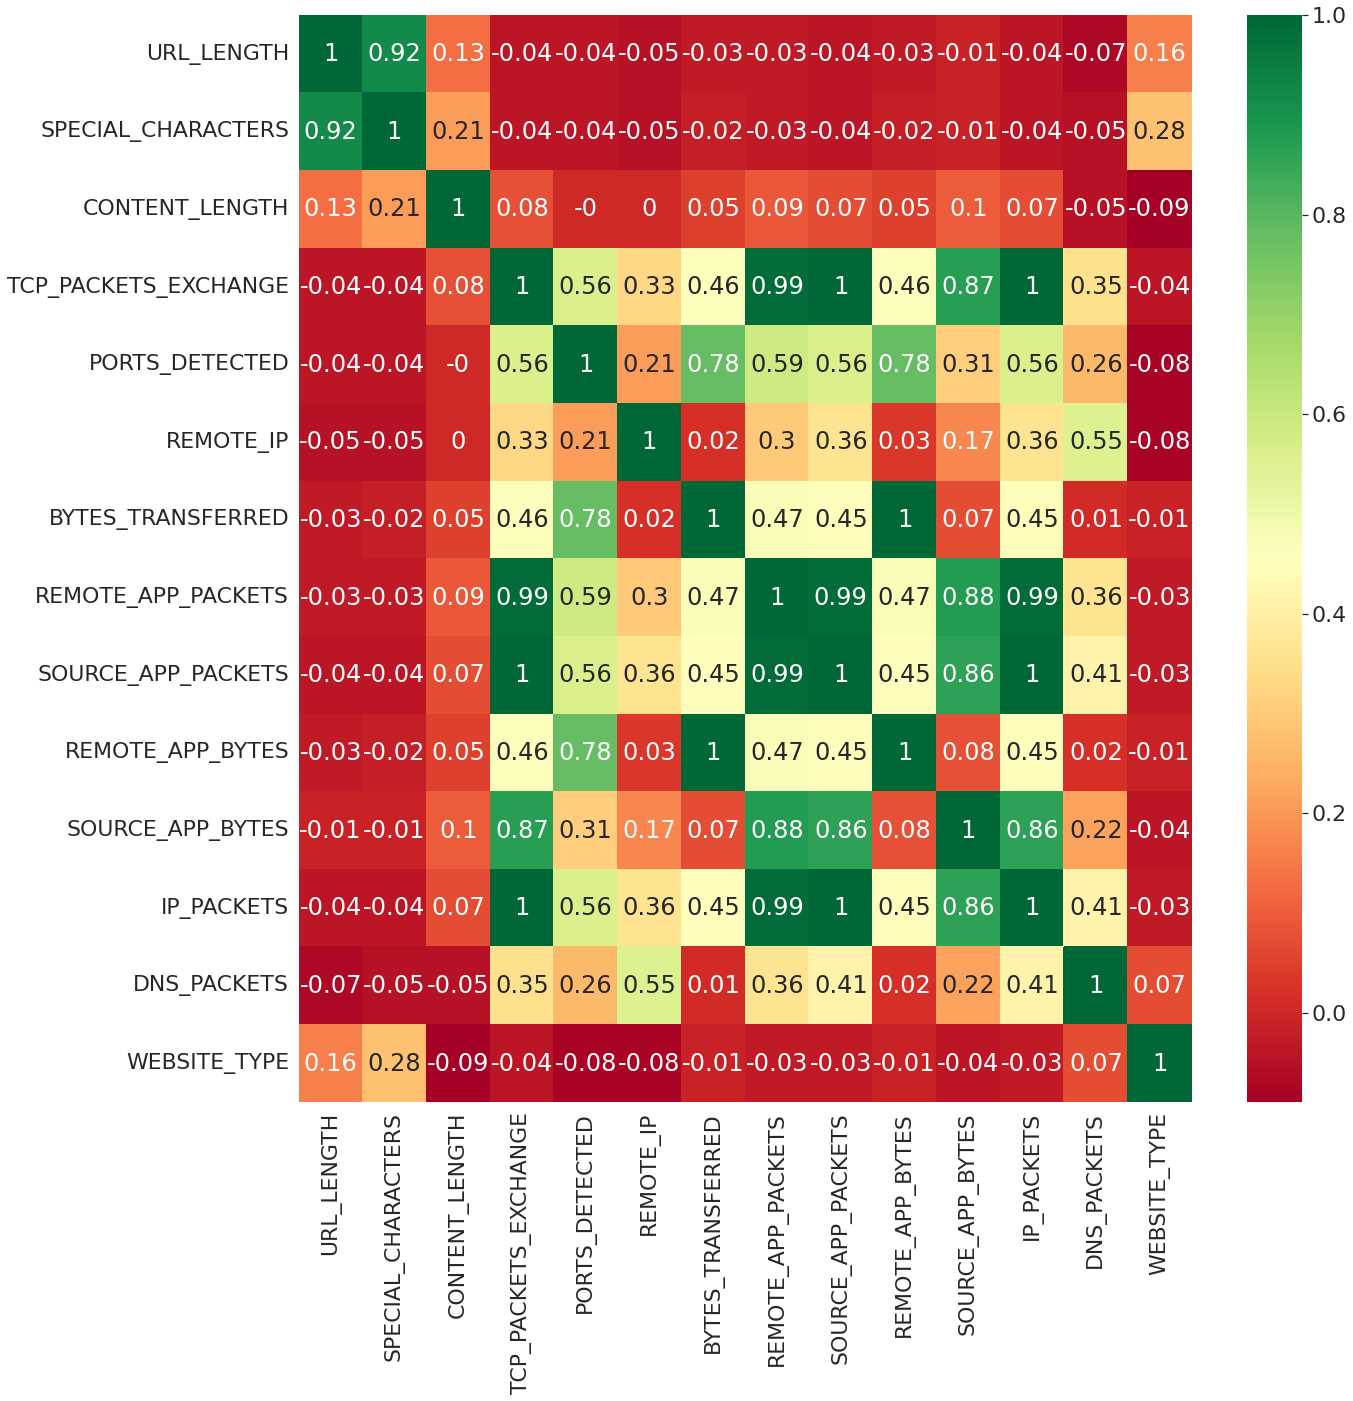

In [69]:
# Plot Correlation Matrix to check feature dependencies and to remove un-necessory features if necessary while feature engineering
corr = df[cont_col].corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(df[cont_col].corr().round(2), cmap='RdYlGn', annot=True)
plt.show()

Few attribute have higher than 0.9 correlation - we must do feature engg on them

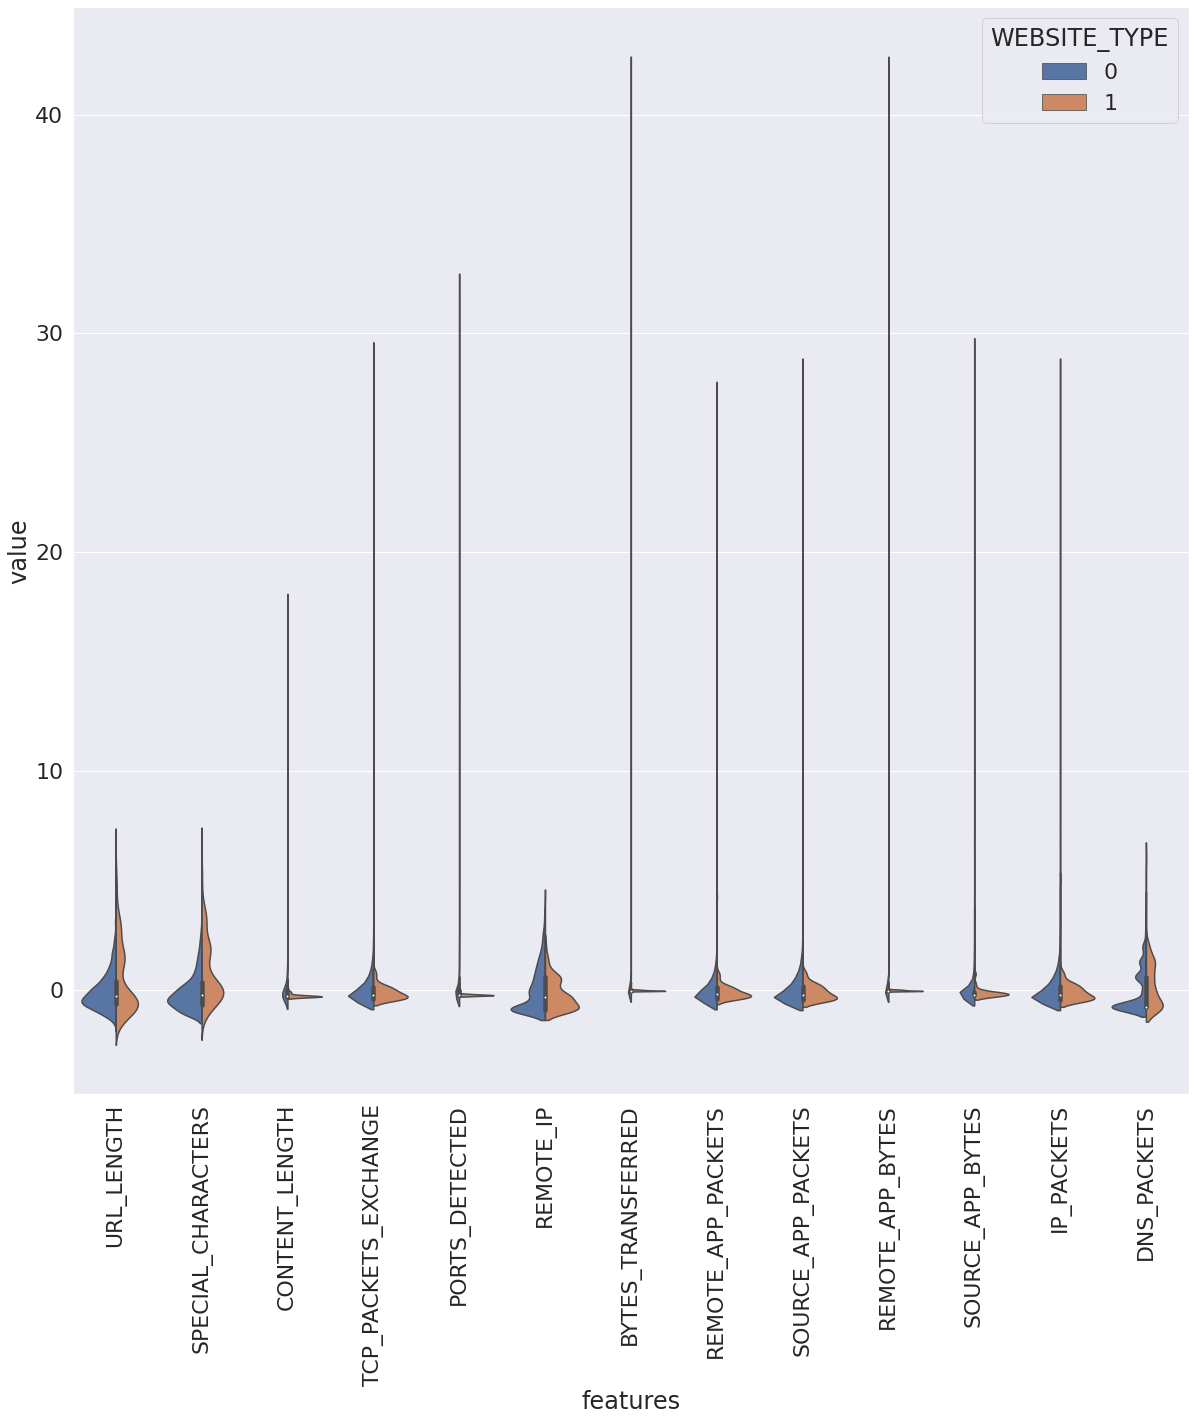

In [70]:
# separating target feature "WEBSITE_TYPE"
y=df.WEBSITE_TYPE
# drop redundant features
x=df[cont_col]
x = x.drop("WEBSITE_TYPE",axis = 1)

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())# Standardized to get better understanding of distribution of data              

data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="WEBSITE_TYPE",var_name="features",value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", hue="WEBSITE_TYPE", data=data,split=True, inner="box")
plt.xticks(rotation=90);

No. of Benign: 1569
No. of Malicious: 217


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


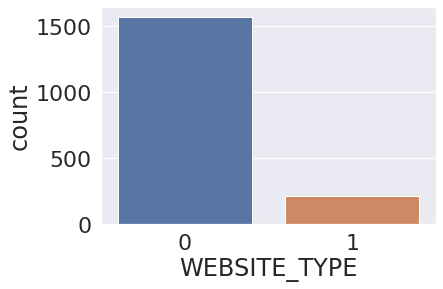

In [71]:
# check class balance
sns.countplot(y)
B,M=y.value_counts()
print("No. of Benign:", B)
print("No. of Malicious:", M)

Class are imbalaned 



## Data Cleaning and Feature Engineering

In [72]:
# fill null values with 0
df=df.fillna(0)

In [73]:
# remove duplicates
df.drop_duplicates()

,URL_IDENTIFICATION,URL_LENGTH,CHARACTER_SET,SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,COUNTRY,STATE,REGISTRATION_DATE,UPDATED_DATE,...,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
0,A0_71,21,ISO-8859-1,7,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,United Kingdom,0,2000-07-16 00:00:00,2015-07-04 00:00:00,...,0,1,717,10,11,1011,1960,11,4.0,1
1,A0_97,21,iso-8859-1,7,nginx,686.0,Russia,Novosibirskaya obl.,2013-05-25 00:00:00,2016-05-23 00:00:00,...,0,2,603,9,8,745,1580,8,2.0,1
2,M0_2303,21,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,0,0,1999-08-09 00:00:00,2015-02-10 00:00:00,...,7,3,618,9,7,618,562,7,0.0,0
3,M0_584,21,utf-8,6,nginx,15025.0,0,0,0,0,...,1,5,1099,17,15,1243,15476,15,2.0,0
4,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,2003-11-02 00:00:00,2015-06-29 00:00:00,...,6,6,696,10,8,696,636,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M3_75,20,utf-8,5,nginx/1.10.1,0.0,0,0,2014-11-08 00:00:00,0,...,0,0,0,1,2,146,62,2,2.0,1
1777,M0_1013,20,utf-8,6,Apache,0.0,America,Kansas,2007-09-14 00:00:00,2015-09-09 00:00:00,...,0,0,0,0,0,0,0,0,0.0,0
1778,M0_1102,20,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,America,CO,2016-11-22 00:00:00,2016-11-23 00:00:00,...,0,0,0,0,0,0,0,0,0.0,0
1779,M0_22,20,utf-8,7,0,13716.0,GB,0,2002-10-11 00:00:00,2016-10-06 00:00:00,...,6,8,1492,20,20,1784,2334,20,4.0,0


In [74]:
# drop column REMOTE_APP_PACKETS due to its high correlation
df.drop(["REMOTE_APP_PACKETS"],inplace = True, axis = 1)

In [75]:
# Convert all columns with string values to string format
df["URL_IDENTIFICATION"] = df["URL_IDENTIFICATION"].astype(str)
df["CHARACTER_SET"] = df["CHARACTER_SET"].astype(str)
df["SERVER"] = df["SERVER"].astype(str)
df["COUNTRY"] = df["COUNTRY"].astype(str)
df["STATE"] = df["STATE"].astype(str)

In [76]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Perform label encoding to convert values to numerical format
df["URL_IDENTIFICATION"] = encoder.fit_transform(df["URL_IDENTIFICATION"])
df["CHARACTER_SET"] = encoder.fit_transform(df["CHARACTER_SET"])
df["SERVER"] = encoder.fit_transform(df["SERVER"])
df["COUNTRY"] = encoder.fit_transform(df["COUNTRY"])
df["STATE"] = encoder.fit_transform(df["STATE"])

In [77]:
# for now i will drop time columns and see what can be done in the future
df.drop(columns=['REGISTRATION_DATE','UPDATED_DATE'],inplace=True)

## Classification

In [78]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [79]:
# Extract the features and labels
X = df.drop("WEBSITE_TYPE", axis=1)
y = df["WEBSITE_TYPE"]

In [80]:
# Split into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
# Use Kfold to distribute into multi5ple splits
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

In [82]:
# count O's and 1's in dataset
from collections import Counter

# Count the number of 0s and 1s in y
counts = Counter(y)

# Print the counts
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 1569
Number of 1s: 217


Since the number of 0 and 1 have much more difference we have to use SMOTE  

(Synthetic Minority Oversampling Technique)

In [83]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=100)
x_resampled, y_resampled = smo.fit_resample(X_train, y_train)
print(np.unique(y_resampled,return_counts=True))
x_resampled.shape
X_train.shape

(array([0, 1]), array([1088, 1088]))


(1250, 17)

### Random Forest Classifier

In [84]:
clf = RandomForestClassifier()

# Set params and fit

params = {'max_features':[2,3,4],
          'n_estimators':[10,20,50,90]}
gcv_cl = GridSearchCV(clf, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_cl.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 90]},
             scoring='roc_auc')

In [85]:
print(gcv_cl.best_params_)
print(gcv_cl.best_score_)

{'max_features': 4, 'n_estimators': 90}
0.9999704054453981


In [86]:
# Evaluate the model on the testing set
best_model_cl=gcv_cl.best_estimator_
y_pred_clf = best_model_cl.predict(X_test)

print(classification_report(y_test, y_pred_clf))
print(roc_auc_score(y_test, y_pred_clf))
print(accuracy_score(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      0.96      0.98        55

    accuracy                           1.00       536
   macro avg       1.00      0.98      0.99       536
weighted avg       1.00      1.00      1.00       536

0.9818181818181818
0.996268656716418


Random Forest Classifier does a good enough Job
1. Recall for 1's (Malicious) is 0.96 which means 96% of the Malicious websites were correctly classified - we should look for a even better model if possible.
2. Other metrics look good

### XGBoost Classifier

In [87]:
XGB = xgb.XGBClassifier(random_state=43)      

# set params and fit

params = {'max_features':[2,3,4],
          'n_estimators':[10,20,50,90]}
gcv_xgb = GridSearchCV(XGB, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_xgb.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBClassifier(random_state=43),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 90]},
             scoring='roc_auc')

In [88]:
print(gcv_xgb.best_params_)
print(gcv_xgb.best_score_)

{'max_features': 2, 'n_estimators': 90}
0.9994672980171648


In [89]:
# Evaluate the model on the testing set
best_model_xgb=gcv_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(roc_auc_score(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       0.98      1.00      0.99        55

    accuracy                           1.00       536
   macro avg       0.99      1.00      0.99       536
weighted avg       1.00      1.00      1.00       536

0.998960498960499
0.9981343283582089


XGBoost Classifier does a good enough Job
1. Recall for 1's (Malicious) is 1 which is better than Random forest for a compromise over precision
2. Other metrics look good - are infact better than Random forest

### KNN

In [90]:
knn=KNeighborsClassifier()

# set params and fit

params = {'n_neighbors':[2,3,4]}
gcv_kn = GridSearchCV(knn, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_kn.fit(x_resampled, y_resampled)

print(gcv_kn.best_params_)
print(gcv_kn.best_score_)

{'n_neighbors': 3}
0.9853961539490887


In [91]:
# Evaluate the model on the testing set

best_model_kn=gcv_kn.best_estimator_
y_pred_knn = best_model_kn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       481
           1       0.72      0.93      0.81        55

    accuracy                           0.96       536
   macro avg       0.85      0.94      0.89       536
weighted avg       0.96      0.96      0.96       536

0.9428463428463428
0.9552238805970149


KNN does a good enough Job - but not better than Random forest and XGBoost

### Logistic Regression

In [92]:
lr = LogisticRegression(random_state=2022)

# Set params and fit

params = {'max_iter':[100,200,300],
          'solver':['liblinear']}
gcv_lr = GridSearchCV(lr, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_lr.fit(x_resampled, y_resampled)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(random_state=2022),
             param_grid={'max_iter': [100, 200, 300], 'solver': ['liblinear']},
             scoring='roc_auc')

In [93]:
print(gcv_lr.best_params_)
print(gcv_lr.best_score_)

{'max_iter': 200, 'solver': 'liblinear'}
0.9283788700310336


In [94]:
# Evaluate the model on the testing set

best_model_lr=gcv_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print(roc_auc_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       481
           1       0.32      0.93      0.48        55

    accuracy                           0.79       536
   macro avg       0.66      0.85      0.67       536
weighted avg       0.92      0.79      0.83       536

0.8513702513702514
0.7910447761194029


Logistic Regression does a average Job


## Conclusion



On wrongly predict the website to be genuine instead of a fraud one would cause a massive problem.

Hence, the cost of False Negatives is much higher than the cost of False Positives.

Cost of False Positive > Cost of False Negative

We need to focus on getting high recall and at the same time, can evaluate the model performance by looking at other metrics like accuracy, precision, and F1 score.

**FINAL MODEL**

XGBoost